# Assignment 2
### Last updated: June 23, 2022

### Name: your_name

### Uniqname: your_uniqname

## Instructions

Please turn in:
1. A Jupyter Notebook file. This file should show all of the required work, including code, results, visualizations (if any), and necessary comments to your code. Irrelevant code and results should be deleted prior to submission. This file is submitted automatically when you submit your notebook to be autograded. This is done in Assignment 2 -- Create. 

2. An HTML file of the Notebook. Submit this file in Assignment 2 - Submit. 

3. A PDF file of the Notebook. Submit this file in Assignment 2 - Submit.  

### Before submitting, please select Kernel -> Restart & Run All.

### Please do not remove any code outside of the Not Implemented Error sections. The autograder may need it. 

# Assignment 2

In [1]:
import networkx as nx
import pandas as pd
import numpy as np

import urllib
import random
import json
import operator
import random

import matplotlib.pyplot as plt
#import seaborn as sns

## Dataset description

In this assignment, you will explore several network generative models to understand how varying model parameters affects network structure. Our exploration will be based on a real-world dataset: 

[Astrophysics collaborations](http://www-personal.umich.edu/~mejn/netdata/astro-ph.zip): a network of coauthorships between scientists posting preprints on the Astrophysics E-Print Archive between Jan 1, 1995 and December 31, 1999. An edge exists between two researchers if they have co-authored at least one paper. 

Newman, M. E. (2001). The structure of scientific collaboration networks. Proceedings of the national academy of sciences, 98(2), 404-409.

Let's load the graph from `assets/astro_phy.gml`.

In [2]:
G = None  # load the graph to G

G = nx.read_gml("assets/astro_phy.gml")

`plot_deg_distribution(G, z, log)` is a helper function that can plot the degree distribution of graph `G` using the NetworkX function `degree_histogram`. `z` is a zoom-in parameter. If $z \ge 0$ is specified, a zoom-in plot will be presented and show only the first $z$ values in the node distribution array. If no $z$ is specified, the plot of the complete node distribution will be shown. `log` is a flag indicating whether to plot the node distribution in log-log scale. It is defaulted to `False`.

In [3]:
class fig_wrapper:
    def __init__(self):
        self.img = None
        self.log = False
        self.x = []
        self.y = []

def plot_deg_distribution(G, z=-1, log=False):
    wrapper = fig_wrapper()
    freq = nx.degree_histogram(G);
    x = [i for i in range(len(freq))]
    if log:
        wrapper.log = True
        freq = [np.log(f+1) for f in freq]
        x = [np.log(i+1) for i in x]
        fig, ax = plt.subplots(figsize = (5, 4))
        ax.scatter(x=x, y=freq, color='#fc7930',s=5);
        ax.set_title("log-log scale")
        wrapper.img = ax
        wrapper.x = x
        wrapper.y = freq
        return wrapper
    if z < 0:
        fig, ax = plt.subplots(figsize = (5, 4))
        ax.scatter(x=x, y=freq, color='#fc7930',s=5);
        ax.set_title("linear scale")
    else:
        fig, ax = plt.subplots(figsize = (5, 4))
        ax.scatter(x=x[:20], y=freq[:20], color='#fc7930',s=5);  # zoom in
        ax.set_title("zoom-in")
    wrapper.img = ax
    wrapper.x = x
    wrapper.y = freq
    print(wrapper)
    return wrapper

--- 

## Part 1. Modeling the real astrophysics collaboration network


### Q1. Degree distribution of the astrophysics collaboration network
#### 1.1 (1 point, Autograded) Plot the node degree distribution of the astrophysics collaboration network in log-log scale using the function `plot_deg_distribution(G, z, log)` provided above.

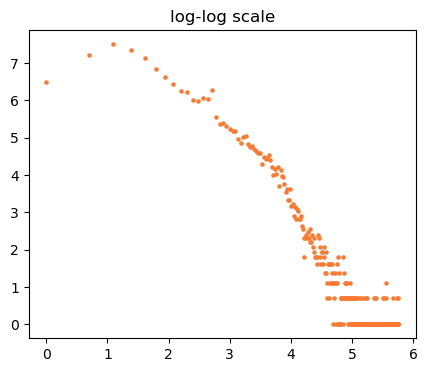

In [4]:
ans = None  # assign the return value of plot_deg_distribution(G, z, log) here
ans = plot_deg_distribution(G, z=-1, log=True)

In [5]:
#hidden tests for Question 1.1 are within this cell

#### 1.2 (1 point, Autograded) Does the distribution look more like a power law distribution or a normal distribution?
> Indicate the distribution by assigning either of the two strings to `distribution_more_like`:
> - `"power law"`
> - `"normal"`

In [6]:
distribution_more_like = "power law"  # a string with the value "power law" or "normal"

In [7]:
#hidden tests for Question 1.2 are within this cell

### Q2. (2 points, Autograded) What is the transitivity and average clustering coefficient of this network?

In [8]:
transitivity = None        # transitivity value. This should be a float. 
average_clustering = None  # average clustering coefficient. This should be a float. 

transitivity = nx.transitivity(G)
average_clustering = nx.average_clustering(G)

In [9]:
#hidden tests for Question 2 are within this cell

### Q3. (3 points, Autograded) What is the maximum, minimum, mean, and standard deviation of the PageRank values of the nodes in $G$?

In [10]:
max_pgv = None  # maximum PageRank value. This should be a float. 
min_pgv = None  # minimum PageRank value. This should be a float. 
mean_pgv = None  # mean of PageRank value. This should be a float. 
std_pgv = None  # standard deviation of PageRank value. This should be a float. 

# Compute the PageRank values for all nodes in the graph
pagerank_values = nx.pagerank(G)

# Extract the values into a list
pgv_list = list(pagerank_values.values())

# Calculate the maximum, minimum, mean, and standard deviation of the PageRank values
max_pgv = max(pgv_list)
min_pgv = min(pgv_list)
mean_pgv = np.mean(pgv_list)
std_pgv = np.std(pgv_list)

In [11]:
#hidden tests for Question 3 are within this cell

### Now that we have obtained some basic properties of the structure of network G, you will compare them with the properties of random networks with around the same number of nodes and edges using the various models we covered in lecture: the Erdős-Rényi model, the preferential attachment model, and a small world model. 

### Erdős-Rényi Graph

The NetworkX function `erdos_renyi_graph` with parameters $n$ and $p$ generates an Erdős-Rényi Graph with `n` nodes and where each pair of nodes is connected by an edge with probability `p`. If the parameter directed is set to `True`, the function generates a directed graph. Since in this case we want an undirected graph, you should set the parameter directed to `False`.

An alternative function, `fast_gnp_random_graph` produces the same graph and has the same parameters as `erdos_renyi_graph`. However, `fast_gnp_random_graph`is faster when the expected number of edges is small (i.e. sparse graph). 

### Q4. (4 points, Autograded) Use the function `fast_gnp_random_graph` to create a random graph $G_1$, such that $G_1$ has the same number of nodes as $G$ and the expected number of edges of $G_1$ is the same as the number of edges in $G$. Plot the node degree distribution of $G_1$.

**Hint**: to pass the autograder, please make sure your plot is in linear scale.

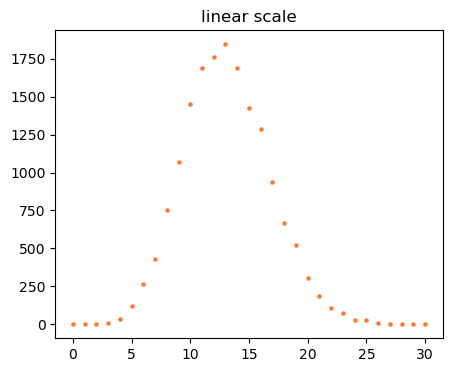

In [12]:
random.seed(0)   # sync the autograder
n = None  # number of nodes. This should be an int. 
m = None  # number of edges. This should be an int. 
p = None  # probability of edges between nodes. This should be a float in [0,1]. 
G1 = None   # assign your networkx graph here.
ans = None  # assign your return value of plot_deg_distribution(G1, z, log) here.

# Get the number of nodes and edges in G
n = G.number_of_nodes()
m = G.number_of_edges()

# Calculate the probability of edges between nodes
p = (2 * m) / (n * (n - 1))

# Create the Erdős-Rényi random graph G1
G1 = nx.fast_gnp_random_graph(n, p)

# Plot the node degree distribution of G1 (in linear scale)
ans = plot_deg_distribution(G1, z=-1, log=False)

In [13]:
#hidden tests for Question 4 are within this cell

### Q5. (2 points, Autograded) What is the transitivity and average clustering coefficient of $G_1$?

In [14]:
transitivity = None # transitivity value. This should be a float. 
average_clustering = None # clustering coefficient value. This should be a float. 

transitivity = nx.transitivity(G1)
average_clustering = nx.average_clustering(G1)

In [15]:
#hidden tests for Question 5 are within this cell

### Q6. (3 points, Autograded) What is the maximum, minimum, mean, and standard deviation of the PageRank values of the nodes in $G_1$?

In [16]:
max_pgv = None  # maximum PageRank value. This should be a float. 
min_pgv = None  # minimum PageRank value. This should be a float. 
mean_pgv = None  # mean of PageRank value. This should be a float. 
std_pgv = None  # standard deviation of PageRank value. This should be a float. 

# Calculate the PageRank values for the nodes in G1
pg_values = nx.pagerank(G1)

# Extract the values from the dictionary returned by nx.pagerank()
pg_values_list = list(pg_values.values())

# Calculate the maximum, minimum, mean, and standard deviation of the PageRank values
max_pgv = np.max(pg_values_list)
min_pgv = np.min(pg_values_list)
mean_pgv = np.mean(pg_values_list)
std_pgv = np.std(pg_values_list)

In [17]:
#hidden tests for Question 6 are within this cell

### Preferential attachment model

The function `barabasi_albert_graph(n, avg_m)` generates a random graph using the preferential attachment model with `n` nodes and where each arriving node attaches to `m` existing nodes. 

### Q7. (4 points, Autograded) Use the preferential attachment model to create a random graph $G_2$, such that $G_2$ has around the same number of nodes and edges as $G$. Plot the node degree distribution of $G_2$ in log-log scale.

**Hint**: 

1. if you cannot find an integer value for the number of edges added by each node, just round down to an integer value.

2. In the function `barabasi_albert_graph(n, avg_m)`, 
    - `n` is the number of nodes
    - `avg_m` is the number of edges to attach from *a new node* to *existing nodes*. 
   Therefore, the total number of edges created by this function is around `n * avg_m`. We already know that $G_1$ has `m` edges. Therefore, using the variables we can calculate `avg_m`.

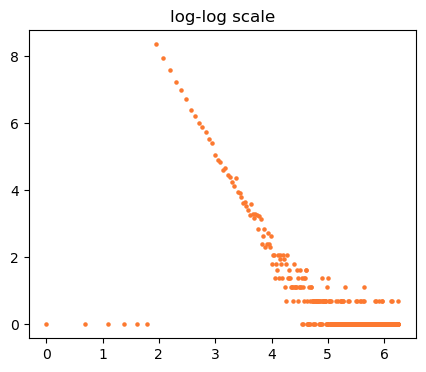

In [18]:
random.seed(0)  # sync for the autograder
ans = None    # assign your return value of plot_deg_distribution(G, z, log) here
avg_m = None  # average number of edges increased by each additional node. This should be an int. 
G2 = None     # assign your networkx graph here

# Calculate the average number of edges increased by each additional node
avg_m = int(m / n)

# Create a random graph G2 using the preferential attachment model
G2 = nx.barabasi_albert_graph(n, avg_m)

# Plot the node degree distribution of G2 in log-log scale
ans = plot_deg_distribution(G2, z=-1, log=True)

In [19]:
#hidden tests for Question 7 are within this cell

### Q8. (2 points, Autograded) What is the transitivity and average clustering coefficient of $G_2$?

In [20]:
transitivity = None # transitivity value. This should be a float. 
average_clustering = None # clustering coefficient value. This should be a float. 

transitivity = nx.transitivity(G2)
average_clustering = nx.average_clustering(G2)

In [21]:
#hidden tests for Question 8 are within this cell

### Q9. (3 points, Autograded) What is the maximum, minimum, mean, and standard deviation of the PageRank values of the nodes in $G_2$?

In [22]:
max_pgv = None  # maximum PageRank value. This should be a float. 
min_pgv = None  # minimum PageRank value. This should be a float. 
mean_pgv = None  # mean of PageRank value. This should be a float. 
std_pgv = None  # standard deviation of PageRank value. This should be a float. 

# YOUR CODE HERE
# Calculate PageRank values for G2
pagerank_values = nx.pagerank(G2)

# Convert the values to a NumPy array
pagerank_values_array = np.array(list(pagerank_values.values()))

# Calculate the maximum, minimum, mean, and standard deviation of PageRank values
max_pgv = pagerank_values_array.max()
min_pgv = pagerank_values_array.min()
mean_pgv = pagerank_values_array.mean()
std_pgv = pagerank_values_array.std()
# raise NotImplementedError()

In [23]:
#hidden tests for Question 9 are within this cell

### Small world networks

The function `nx.watts_strogatz_graph(n,k,p)` generates a small world network with `n` nodes. Initially, nodes are connected to their `k` nearest neighbors in a ring topology. Then each edge is rewired with probability `p`.


### Q10. (4 points, Autograded) Create a small world network $G_3$ with the same number of nodes as network $G$ and with a number of edges that is as close as possible to the number of edges in network $G$.  Plot the node degree distribution of $G_3$ in log-log scale. Set $p=0.1$.

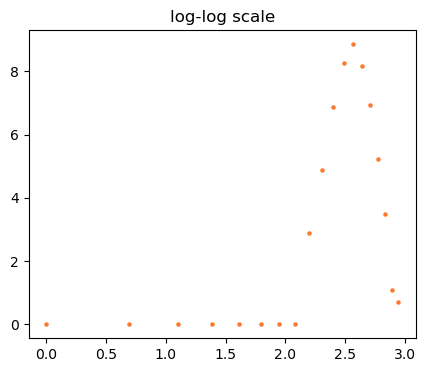

In [24]:
random.seed(0)  # sync for autograder
G3 = None       # your networkx graph
ans = None      # assign your return value of plot_deg_distribution(G, z, log) here

# YOUR CODE HERE
# Calculate the average degree in G
avg_degree = 2 * m / n

# Calculate the k parameter for the Watts-Strogatz graph
# k = round(avg_degree)
k = int(avg_degree // 2 * 2)

# Generate the small world network G3
p = 0.1
G3 = nx.watts_strogatz_graph(n, k, p)

# Plot the node degree distribution of G3 in log-log scale
ans = plot_deg_distribution(G3, z=-1, log=True)
# raise NotImplementedError()

In [25]:
#hidden tests for Question 10 are within this cell

### Q11. (2 points, Autograded) What is the transitivity and average clustering coefficient of $G_3$?

In [26]:
transitivity = None # transitivity value. This should be a float. 
average_clustering = None # clustering coefficient value. This should be a float. 

# YOUR CODE HERE
transitivity = nx.transitivity(G3)
average_clustering = nx.average_clustering(G3)
# raise NotImplementedError()

In [27]:
#hidden tests for Question 11 are within this cell

### Q12. (3 points, Autograded) What is the maximum, minimum, mean, and standard deviation of the PageRank values of the nodes in $G_3$?

In [28]:
max_pgv = None  # maximum PageRank value. This should be a float. 
min_pgv = None  # minimum PageRank value. This should be a float. 
mean_pgv = None  # mean of PageRank value. This should be a float. 
std_pgv = None  # standard deviation of PageRank value. This should be a float. 

# YOUR CODE HERE
# Calculate the PageRank values for G3
pagerank_values = nx.pagerank(G3)

# Extract the values as a list
pagerank_list = list(pagerank_values.values())

# Calculate the maximum, minimum, mean, and standard deviation
max_pgv = max(pagerank_list)
min_pgv = min(pagerank_list)
mean_pgv = np.mean(pagerank_list)
std_pgv = np.std(pagerank_list)
# raise NotImplementedError()

In [29]:
#hidden tests for Question 12 are within this cell

### Q13. (3 points, Autograded) Using the same values of `n` and `k` as you did for network $G_3$, generate a small world network using every $p$ in `np.linspace(0.1, 1, 10)` and compute the graph transitivity and average clustering coefficient. Plot a line graph for both attributes versus $p$.


In [30]:
tran = np.zeros(10)   # assign your graph transitivity values as a numpy array to this variable.
clus = np.zeros(10)   # assign your average clustering coefficient values as a numpy array to this variable.

# YOUR CODE HERE
n_values = len(np.linspace(0.1, 1, 10))
tran = np.zeros(n_values)
clus = np.zeros(n_values)

for i, p in enumerate(np.linspace(0.1, 1, 10)):
    G_temp = nx.watts_strogatz_graph(n, k, p)
    tran[i] = nx.transitivity(G_temp)
    clus[i] = nx.average_clustering(G_temp)
# raise NotImplementedError()

In [31]:
#hidden tests for Question 13 are within this cell

### (2 points, Manually graded) Include the two plots here:

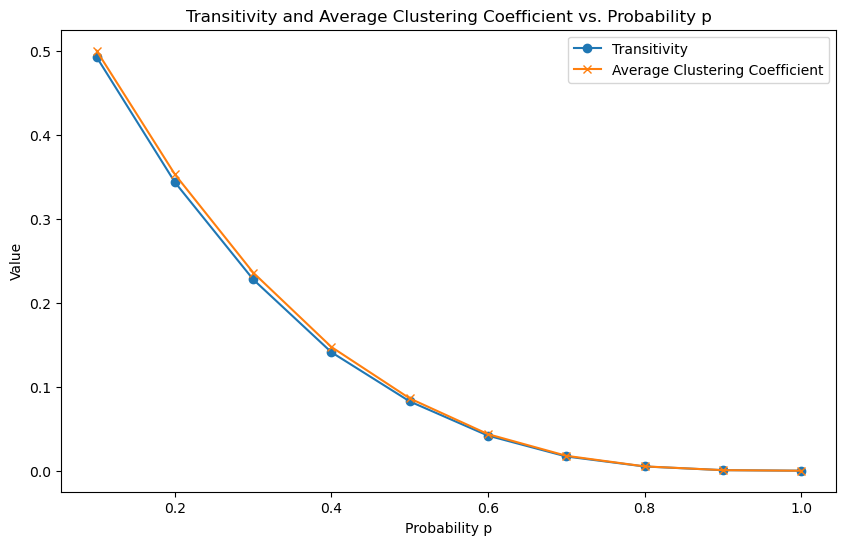

In [32]:
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0.1, 1, 10), tran, label='Transitivity', marker='o')
plt.plot(np.linspace(0.1, 1, 10), clus, label='Average Clustering Coefficient', marker='x')
plt.xlabel('Probability p')
plt.ylabel('Value')
plt.title('Transitivity and Average Clustering Coefficient vs. Probability p')
plt.legend()
plt.show()
# raise NotImplementedError()

### Q14. (2 points, Autograded) Compare the features of the simulated networks with the real network $G$ and think of the following questions:

1. In terms of node degree distribution, which model should be most similar to the collaboration network?
2. In terms of transitivity and average clustering coefficient, which model should best approximate the collaboration network?

Indicate the solution of each question with one of the following strings:
- "Erdős-Rényi"
- "preferential attachment model"
- "small world network"

The questions are represented by `q1` and `q2`. For example, if you believe the answer to the first sub-question is Erdős-Rényi you should answer:
```python
q1 = "Erdős-Rényi"
```

In [33]:
q1 = None # This should be a string
q2 = None # This should be a string

# YOUR CODE HERE
q1 = "preferential attachment model"
q2 = "small world network"
# raise NotImplementedError()

we chose the preferential attachment model for the node degree distribution, as it is known for generating networks with a power-law degree distribution, which is similar to the collaboration network. For transitivity and average clustering coefficient, the small world network is the best approximation, as it tends to have higher values for these attributes than the Erdős-Rényi model and can better represent real-world networks with a high clustering coefficient.

In [34]:
#hidden tests for Question 14 are within this cell

---

## Part 2. Clustering of the generative models

In this part, you will explore the clustering coefficient and transitivity of the aforementioned generative models. Rather than making comparisons based on a single instance of each type of network, you will generate multiple random graphs and construct a distribution of the values. You will construct networks with relatively few nodes and edges to make the computation more efficient. The networks will have 100 nodes and around 425 edges. 

### Q15. (6 points, Autograded) Create 1000 random Erdős-Rényi graphs with `fast_gnp_random_graph` such that the networks have 100 nodes and are expected to have 425 edges.  For each graph, compute its transitivity and average clustering coefficient. Plot a histogram for both attributes.

<font color='red'>**Note**</font>: for the plots, use the function `hist` and set the parameter `bins=50`.

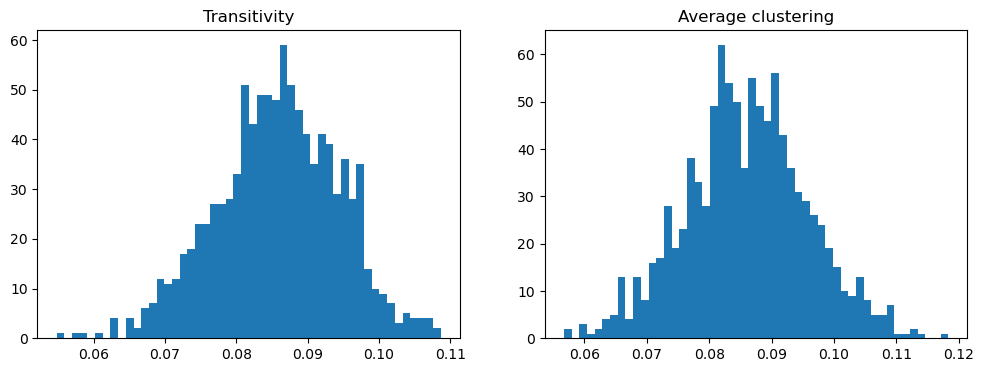

In [35]:
random.seed(0)
tran = np.zeros(1000)   # assign your graph transitivity values as a numpy array to this variable.
clus = np.zeros(1000)   # assign your average clustering coefficient values as a numpy array to this variable.

# fig, axes = plt.subplots(1,2,figsize = (12, 4))
# axes[0].title.set_text("Transitivity");         # plot transitivity in subplot 0
# axes[1].title.set_text("Average clustering");   # plot average clustering in subplot 1

# YOUR CODE HERE

n = 100
m = 425
p = 2 * m / (n * (n - 1))


for i in range(1000):
    G = nx.fast_gnp_random_graph(n, p)
    tran[i] = nx.transitivity(G)
    clus[i] = nx.average_clustering(G)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].title.set_text("Transitivity")
axes[0].hist(tran, bins=50)
axes[1].title.set_text("Average clustering")
axes[1].hist(clus, bins=50)

plt.show()

# raise NotImplementedError()


In [36]:
#hidden tests for Question 15 are within this cell

### Q16. (6 points, Autograded) Create 1000 preferential attachment graphs with 100 nodes and each arriving node connecting to 4 existing nodes. For each graph, compute its transitivity and average clustering coefficient. Plot a histogram for both attributes.

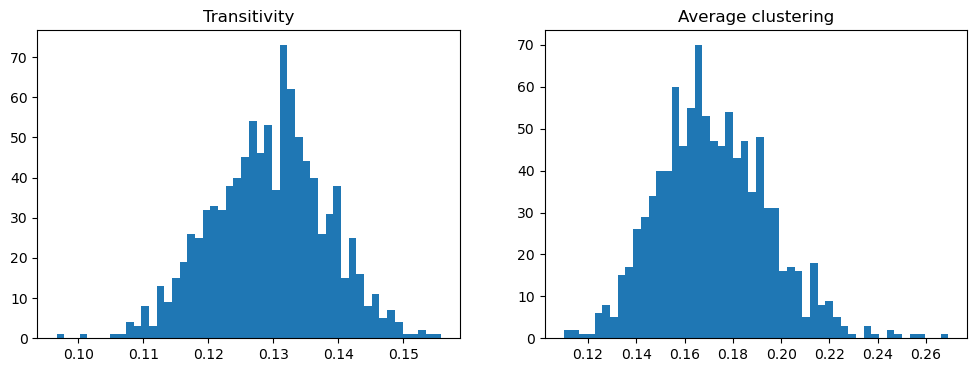

In [37]:
# random.seed(0)

# tran = np.zeros(1000)   # assign your graph transitivity values as a numpy array to this variable.
# clus = np.zeros(1000)   # assign your average clustering coefficient values as a numpy array to this variable.

# fig, axes = plt.subplots(1,2,figsize = (12, 4))
# axes[0].title.set_text("Transitivity");         # plot transitivity in subplot 0
# axes[1].title.set_text("Average clustering");   # plot average clustering in subplot 1

# YOUR CODE HERE

random.seed(0)
n = 100
m = 4

tran = np.zeros(1000)
clus = np.zeros(1000)

for i in range(1000):
    G = nx.barabasi_albert_graph(n, m)
    tran[i] = nx.transitivity(G)
    clus[i] = nx.average_clustering(G)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].title.set_text("Transitivity")
axes[0].hist(tran, bins=50)
axes[1].title.set_text("Average clustering")
axes[1].hist(clus, bins=50)

plt.show()
# raise NotImplementedError()

In [38]:
#hidden tests for Question 16 are within this cell

### Q17. (6 points, Autograded) Create 1000 small world graphs with 100 nodes, $k = 4$, and rewiring probability $p=0.1$. For each graph, compute its transitivity and average clustering coefficient. Plot a histogram for both attributes.

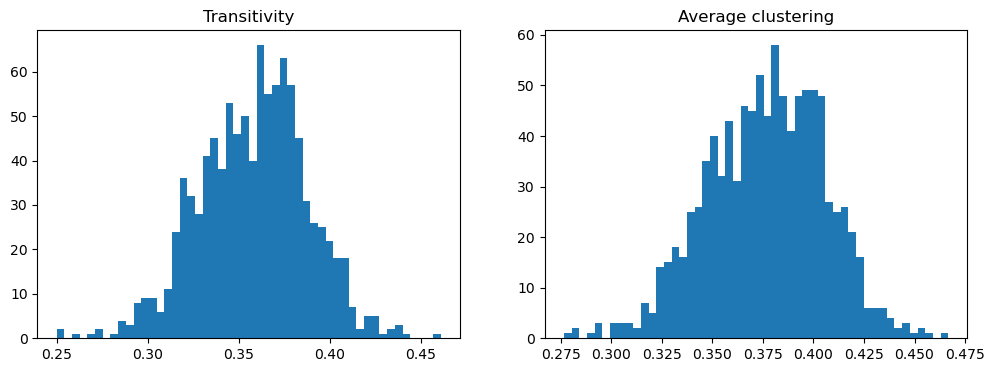

In [39]:
# random.seed(0)

# tran = np.zeros(1000)   # assign your graph transitivity values as a numpy array to this variable.
# clus = np.zeros(1000)   # assign your average clustering coefficient values as a numpy array to this variable.

# fig, axes = plt.subplots(1,2,figsize = (12, 4))
# axes[0].title.set_text("Transitivity");         # plot transitivity in subplot 0
# axes[1].title.set_text("Average clustering");   # plot average clustering in subplot 1

# YOUR CODE HERE
random.seed(0)
n = 100
k = 4
p = 0.1

tran = np.zeros(1000)
clus = np.zeros(1000)

for i in range(1000):
    G = nx.watts_strogatz_graph(n, k, p)
    tran[i] = nx.transitivity(G)
    clus[i] = nx.average_clustering(G)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].title.set_text("Transitivity")
axes[0].hist(tran, bins=50)
axes[1].title.set_text("Average clustering")
axes[1].hist(clus, bins=50)

plt.show()
# raise NotImplementedError()

In [40]:
#hidden tests for Question 17 are within this cell

### Q18. (10 points, Manually graded) Compare the distribution plots of clustering coefficient values across the different network generative models. 

### Which model gives the highest clustering coefficient values? 

### Which model gives the lowest clustering coefficient values? 

### Explain your results using the assumptions and mechanisms of the models.

Your explanation should be of the form: 

Model X produces networks with the highest clustering coefficient because...

Model Y produces networks with the lowest clustering coefficient because...


Based on the generated distribution plots, we can make the following observations:

Small world model produces networks with the highest clustering coefficient values because it starts with a ring lattice where nodes are connected to their k nearest neighbors. This initial structure already has a high clustering coefficient. When rewiring is introduced, only a small proportion of edges are rewired, preserving the high clustering coefficient while introducing some randomness to the network. As a result, the small world model generates networks with a high degree of local clustering.

Erdős-Rényi model produces networks with the lowest clustering coefficient values because it creates networks by connecting nodes with a fixed probability p, independently of their existing connections. This random connection process does not favor the formation of triangles or clustering in the network, resulting in a lower clustering coefficient compared to other models.

The preferential attachment model falls between the Erdős-Rényi and small world models in terms of clustering coefficient values. In the preferential attachment model, new nodes are more likely to connect to nodes with a higher degree, creating a network with a scale-free degree distribution. This leads to the formation of hub nodes with many connections, which can contribute to local clustering. However, the clustering coefficient of preferential attachment networks is generally lower than that of small world networks, as it does not explicitly preserve the initial high clustering structure.

---
## Part 3. Link prediction

In this part, we are going to compare various link prediction features to predict if an edge exists in the astrophysics collaboration network. We will use the following features and their corresponding `NetworkX` functions (See [NetworkX link prediction documentation](https://networkx.github.io/documentation/networkx-1.9/reference/algorithms.link_prediction.html)).  

- Resource Allocation Index --  `resource_allocation_index(G[, ebunch])`. 
- Jaccard Coefficient -- `jaccard_coefficient(G[, ebunch])`. 
- Adamic-Adar Index -- `adamic_adar_index(G[, ebunch])`.
- Preferential Attachment Score -- `preferential_attachment(G[, ebunch])`. 
- Number of Common Neighbors -- This feature will be provided in our data set. 

The `assets/part3.csv` contains the set of pairs of nodes you will use for training and testing in the prediction task. Some of the pairs in `assets/part3.csv` are connected by an edge in the network and others are not. Our goal will be to predict which ones are connected using our link prediction features. 

The file contains 4 columns (`v1`, `v2`, `num`, `label`). Columns `v1` and `v2` represent pairs of nodes (v1,v2), `num` is the number of common neighbors between v1 and v2, and `label` is 1 if the edge (v1,v2) exists in the network and 0 otherwise. 

The astrophysics collaboration network `G` is fixed. That is, we will not make changes to the network. We will use the structure of the network to "predict" which pairs of nodes are connected (pretending we cannot simply check if the edge `(v1,v2)` exists in `G`). The intuition here is that we will pretend that these edges are not yet present in the network, and use the link prediction features to predict whether they will emerge. 

Caveats: 

Note that we are cheating slightly since we are using these edges to compute the link prediction features. Typically, if we are trying to predict edges that have not yet emerged, we cannot use them at all. 

As you may see, there is approximately the same number of positive and negative labels in the test dataset. This is artificially selected to facilitate the prediction task. In reality, this is rarely the case since in link prediction positive samples are far less common than negative ones.

However, we will use this setup to illustrate the procedure. 

Let's begin by importing the libraries we will need. 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

Now let's load data from `part3.csv`, which contains the number of common neighbors and labels. 
### Q19.  (5 points, Manually graded) Expand the dataframe to include the other features and print part of the resulting dataframe. This may take some time. Print the top 10 rows of the dataframe. 

Recall that you should not change the network `G` in any way. 

In [42]:
%%time
G = nx.read_gml('assets/astro_phy.gml')
link_pred = pd.read_csv('assets/part3.csv')
link_pred['rai'] = None  # resource_allocation_index of the node pairs
link_pred['jac'] = None  # jaccard_coefficient of the node pairs
link_pred['ada'] = None  # adamic_adar of the node pairs
link_pred['pa']  = None  # preferential_attachment of the node pairs

# YOUR CODE HERE
for index, row in link_pred.iterrows():
    u, v = row['v1'], row['v2']
    
    # Compute resource_allocation_index
    rai = list(nx.resource_allocation_index(G, [(u, v)]))[0][2]
    
    # Compute jaccard_coefficient
    jac = list(nx.jaccard_coefficient(G, [(u, v)]))[0][2]
    
    # Compute adamic_adar_index
    ada = list(nx.adamic_adar_index(G, [(u, v)]))[0][2]
    
    # Compute preferential_attachment
    pa = list(nx.preferential_attachment(G, [(u, v)]))[0][2]
    
    # Assign values to the DataFrame
    link_pred.at[index, 'rai'] = rai
    link_pred.at[index, 'jac'] = jac
    link_pred.at[index, 'ada'] = ada
    link_pred.at[index, 'pa'] = pa

print(link_pred.head(10))
# raise NotImplementedError()



             v1                v2  num  label       rai       jac       ada  \
0    BASKETT, L  SUTHERLAND, TMCW    9      0  0.096704  0.409091  1.983937   
1   BROWNE, IWA        JACKSON, N   10      1  0.559679  0.222222  3.442149   
2      MACRI, L         AJHAR, EA    8      0  0.144501  0.068966  1.965276   
3    ALVAREZ, D         MILLER, K   13      1  0.596234  0.866667  4.158348   
4       ABAD, C      HONEYCUTT, K   40      1  0.719897  0.727273  9.872832   
5  TILANUS, RPJ       MCMAHON, RG    5      0  0.109267  0.023364  1.301187   
6    WILKES, BJ         PETERS, J   20      1  0.414744  0.210526  5.089013   
7    BONALDI, M         SALEMI, F   35      1  0.847962  0.714286  9.399725   
8   TUTHILL, PG      NISHIMOTO, D    8      1  0.656226       0.5  3.148903   
9    MORALES, J         FARACH, H   15      1   0.53178  0.326087   4.46437   

     pa  
0   240  
1   516  
2  3700  
3   196  
4  2256  
5  8568  
6  2844  
7  1764  
8   135  
9   840  
CPU times: user 8min

### Q20. (4 points, Manually graded) Plot histograms of the values of each of the features (num, rai, jac, ada, pa); one set of histograms will be for pairs of nodes with label = 1 and another set for pairs of nodes with label = 0.

There will be a total of 10 histograms -- 2 per feature. 


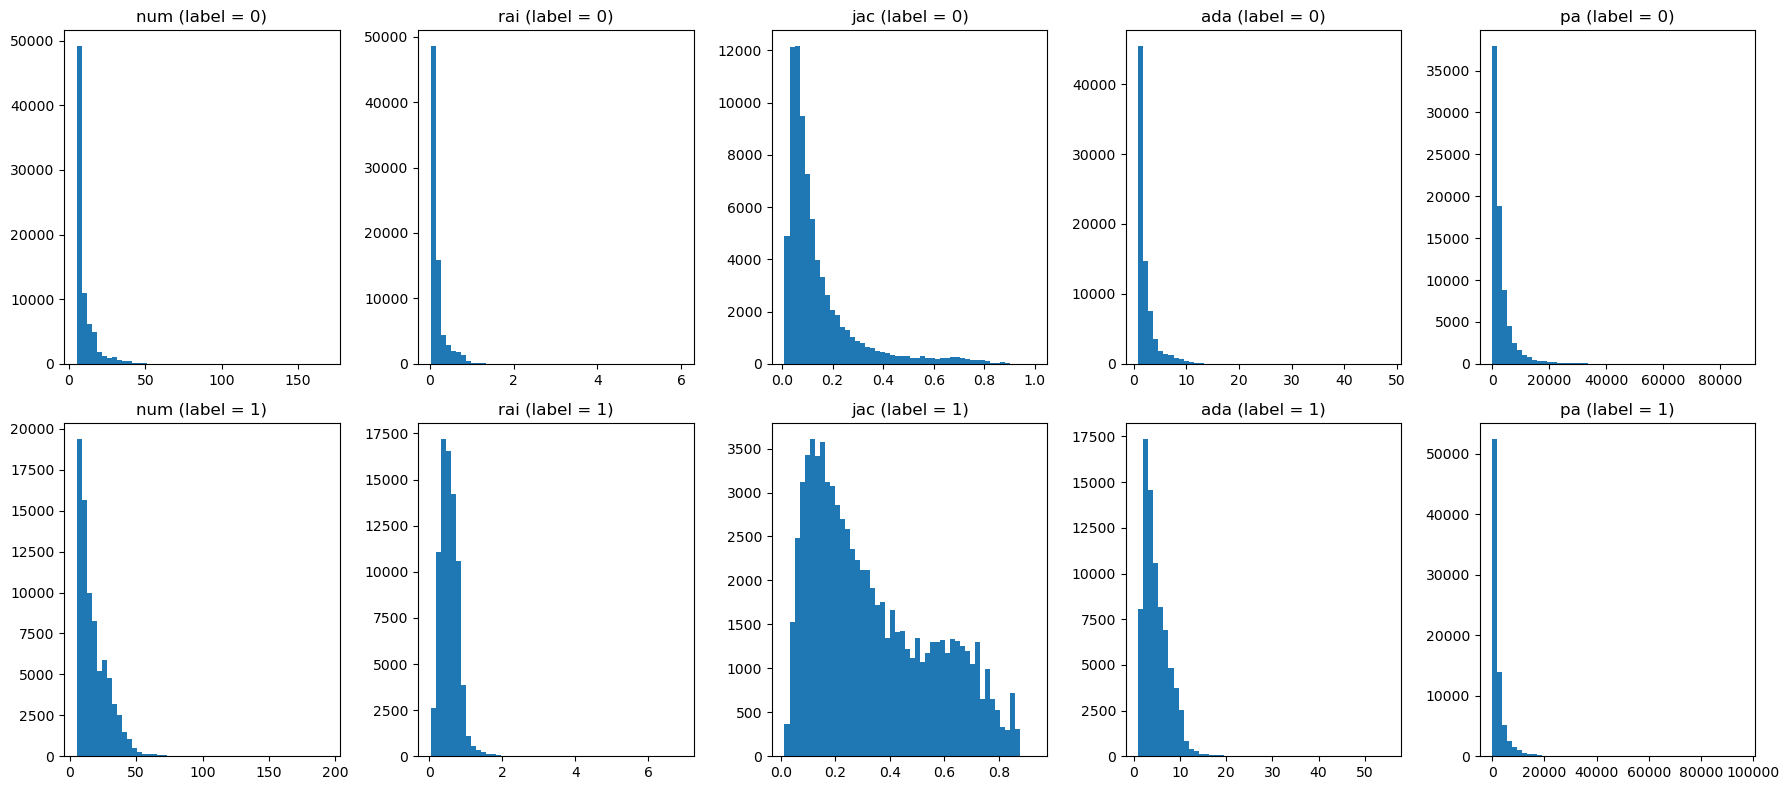

In [43]:
# selected_attributes = None
# YOUR CODE HERE

# Filter the link_pred DataFrame based on the label value
link_pred_0 = link_pred[link_pred['label'] == 0]
link_pred_1 = link_pred[link_pred['label'] == 1]

# Select the attributes for the histograms
selected_attributes = ['num', 'rai', 'jac', 'ada', 'pa']

# Create subplots with two rows and columns equal to the number of selected attributes
fig, axes = plt.subplots(2, len(selected_attributes), figsize=(18, 8))

# Iterate through the selected attributes and create histograms
for i, attribute in enumerate(selected_attributes):
    # Plot histograms for label 0
    axes[0, i].hist(link_pred_0[attribute], bins=50)
    axes[0, i].set_title(f"{attribute} (label = 0)")
    
    # Plot histograms for label 1
    axes[1, i].hist(link_pred_1[attribute], bins=50)
    axes[1, i].set_title(f"{attribute} (label = 1)")

plt.tight_layout()
plt.show()
# raise NotImplementedError()

### Q21. (1 points, Autograded) Measure the correlation between each of the five attributes and the label. 

**Hint**: You may apply [`pandas.DataFrame.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) for this question. The desired correlation dataframe should be in a square size, and the index names and the column names are the same. 

In [44]:
corr = None  # Assign your correlation dataframe to this variable. This should be a float. 

# YOUR CODE HERE
# Calculate the correlation between the attributes and the label
link_pred[[ 'rai', 'jac', 'ada', 'pa']] = link_pred[[ 'rai', 'jac', 'ada', 'pa']].astype('float')
corr = link_pred[['num', 'rai', 'jac', 'ada', 'pa', 'label']].corr()

# Print the correlation DataFrame
print(corr)
# raise NotImplementedError()

            num       rai       jac       ada        pa     label
num    1.000000  0.691309  0.526966  0.977110  0.284549  0.377449
rai    0.691309  1.000000  0.694429  0.826830 -0.004753  0.619286
jac    0.526966  0.694429  1.000000  0.618852 -0.286523  0.460965
ada    0.977110  0.826830  0.618852  1.000000  0.208934  0.474494
pa     0.284549 -0.004753 -0.286523  0.208934  1.000000 -0.100315
label  0.377449  0.619286  0.460965  0.474494 -0.100315  1.000000


In [45]:
#hidden tests for Question 21 are within this cell


### Q22. (1 point, Autograded) Based on the correlations, which single feature do you expect to perform best at predicting edges?

Set the column name of your selection into the variable `selected_attribute` as a string. For example, if you select the attribute "number of common neighbors", indicate this as

```python
selected_attribute = "num"
```

In [46]:
selected_attribute = None #choose your selected attribute. This should be a string. 

# YOUR CODE HERE
# Find the feature with the highest correlation with the label
selected_attribute = corr.loc['label'].drop('label').idxmax()

# Print the selected attribute
print(selected_attribute)
# raise NotImplementedError()

rai


In [47]:
#hidden tests for Question 22 are within this cell

### Q23. (20 points, Manually graded) Link prediction

We are now ready to train and test classifiers for the link prediction task. 

First, we will split the data into training and testing.

In [48]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    link_pred[["num", "rai","jac","ada","pa"]], link_pred.label, test_size=0.3, random_state=42)

Now use each feature as the only attribute for the link prediction task. Train and test the performance of four different models:

- `LinearSVC`
- `GaussianNB`
- `RandomForestClassifier`
- `AdaBoostClassifier`

You can choose any hyperparameters. 

Create a dataframe `F1_score_df`, which stores the F1-score of your test set for each of the four features for each model.

Finally, train and test the performance of each model using all five features, and add a new column to the dataframe with the test F1 score. 


You dataframe will have the following format:

| model| num| rai| jac| ada|pa|all features|
|-|-|-|-|-|-|-|
|LinearSVC|
|GaussianNB|
|RandomForestClassifier|
|AdaBoostClassifier|

Be sure to print the final dataframe. 

In [49]:
F1_score_df = None

# YOUR CODE HERE
F1_score_df = pd.DataFrame(index=["LinearSVC", "GaussianNB", "RandomForestClassifier", "AdaBoostClassifier"],
                           columns=["num", "rai", "jac", "ada", "pa", "all features"])

models = {
    "LinearSVC": LinearSVC(),
    "GaussianNB": GaussianNB(),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=42)
}

features = ["num", "rai", "jac", "ada", "pa"]

for model_name, model in models.items():
    for feature in features:
        model.fit(X_train[[feature]], y_train)
        y_pred = model.predict(X_test[[feature]])
        F1_score_df.loc[model_name, feature] = f1_score(y_test, y_pred)

# raise NotImplementedError()

In [50]:
# YOUR CODE HERE
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    F1_score_df.loc[model_name, "all features"] = f1_score(y_test, y_pred)

print(F1_score_df)
# raise NotImplementedError()

                             num       rai       jac       ada        pa  \
LinearSVC               0.000675  0.813808  0.667639   0.69553  0.670125   
GaussianNB              0.555127  0.789968  0.620464  0.632489  0.651247   
RandomForestClassifier  0.697149  0.803499  0.736217   0.74091  0.599767   
AdaBoostClassifier      0.697286  0.868025  0.742657  0.797866  0.518097   

                       all features  
LinearSVC                  0.710786  
GaussianNB                 0.708911  
RandomForestClassifier     0.876475  
AdaBoostClassifier          0.86922  


In [51]:
F1_score_df

,num,rai,jac,ada,pa,all features
LinearSVC,0.000675,0.813808,0.667639,0.69553,0.670125,0.710786
GaussianNB,0.555127,0.789968,0.620464,0.632489,0.651247,0.708911
RandomForestClassifier,0.697149,0.803499,0.736217,0.74091,0.599767,0.876475
AdaBoostClassifier,0.697286,0.868025,0.742657,0.797866,0.518097,0.86922


# End